# 🎬 Movie Correlation Project

Exploring relationships in a movies dataset (`movies.csv`) with a focus on **budget vs. gross revenue** and other drivers of box office performance.

**You’ll see:**
- Data audit & cleaning (missing values, duplicates, dtypes)
- Feature engineering (Year from `released`)
- Visual EDA (scatter + regression, category plots)
- Correlation analysis (numeric & numerized categorical features)
- Company performance rollups

## 1) Setup & Imports

In [1]:
# Silence noisy warnings for a cleaner render
import warnings
warnings.filterwarnings("ignore")

# Core libraries
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


# Plot settings and Aesthetics
plt.style.use("ggplot")
sns.set_theme(style="whitegrid", context="notebook")
mpl.rcParams["figure.figsize"] = (12, 8)

# Pandas display settings
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 120)


## 2) Load Data
Make sure `movies.csv` is in the working directory.

In [2]:
# Load dataset
df = pd.read_csv("data/movies.csv")

# Quick look at the dataset
display(df.head())
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


Shape: 7,668 rows × 15 columns


## 3) Data Audit (Missing & Duplicates)
We’ll quantify missingness per column, then decide on a simple, transparent cleaning policy for this demo.

In [3]:
pct_missing = (df.isnull().mean()).mul(100).sort_values(ascending=False)
print("Values Missing % by column:")
pct_missing = pd.DataFrame(pct_missing, columns=['pct_missing'])
display(pct_missing)

Values Missing % by column:


,pct_missing
budget,28.312467
gross,2.464789
rating,1.004173
company,0.221701
runtime,0.052165
score,0.039124
votes,0.039124
writer,0.039124
country,0.039124
released,0.026082


In [4]:
#  - drop duplicate rows
#  - drop rows with any NA in key numeric columns we analyze (budget, gross)

df = df.drop_duplicates().copy()
df = df.dropna(subset=['gross','budget']).copy()
print("After basic cleaning:", df.shape)

After basic cleaning: (5436, 15)


## 4) Type Normalization & Feature Engineering
- Cast `budget` & `gross` to integers (robustly).
- Extract a 4-digit **year** from `released`.
- Sort by `gross` for consistent previews.

In [5]:
# Check column data types
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [6]:
# Convert budget & gross to integers
df["budget"] = df["budget"].astype("int64")
df["gross"]  = df["gross"].astype("int64")

# Extract year from 'released' column
df["year"] = df["released"].str.extract(r"(\d{4})").astype("int64")

# Sort dataset by gross earnings
df = df.sort_values(by="gross", ascending=False)

display(df.head())

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


## 5) Exploratory Visuals: Budget vs Gross

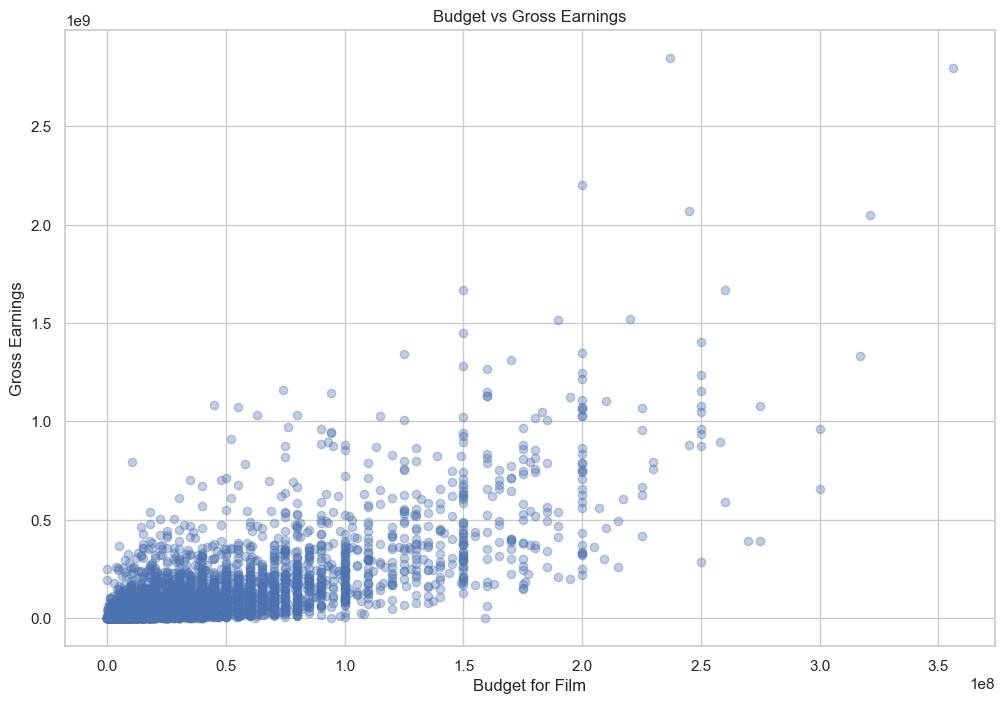

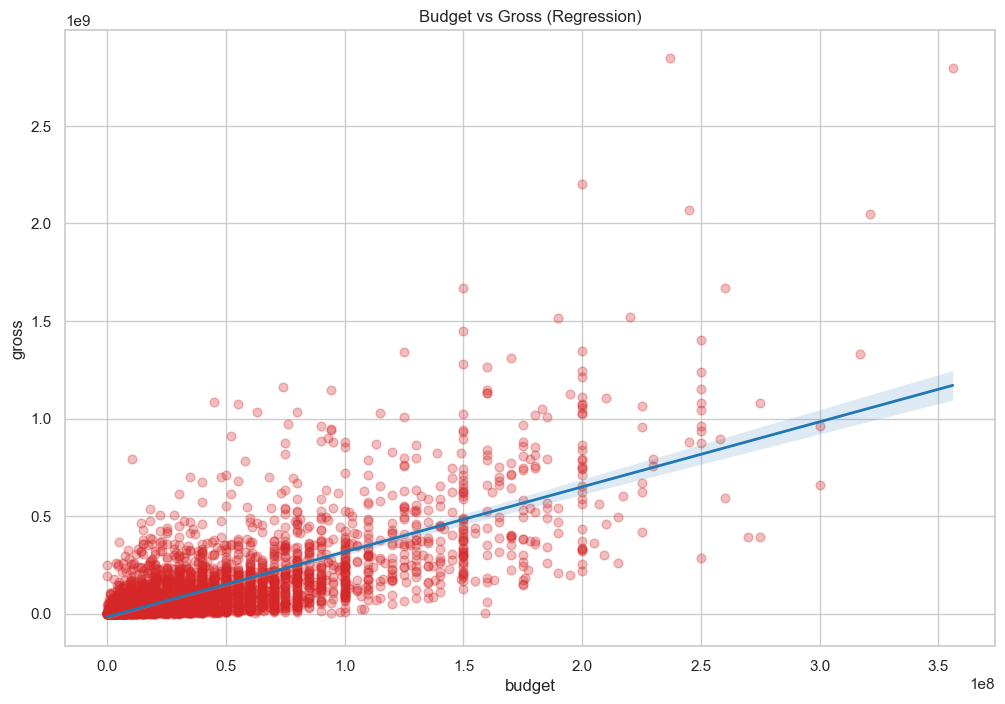

In [7]:
# Basic scatter plot
plt.scatter(x=df["budget"], y=df["gross"], alpha=0.35)
plt.title("Budget vs Gross Earnings")
plt.xlabel("Budget for Film")
plt.ylabel("Gross Earnings")
plt.show()

# Regression plot with Seaborn
sns.regplot(x="budget", y="gross", data=df,
            scatter_kws={"alpha": 0.3, "s": 40, "color": "#d62728"},
            line_kws={"color": "#1f77b4", "lw": 2})
plt.title("Budget vs Gross (Regression)")
plt.show()

## 6) Company Performance Snapshots
Top companies by total gross (overall and by year).

In [8]:
top_companies = (
    df.groupby("company", as_index=False)["gross"]
      .sum()
      .sort_values("gross", ascending=False)
      .head(15)
)
display(top_companies)

,company,gross
1432,Warner Bros.,54773202654
1403,Universal Pictures,51241105418
454,Columbia Pictures,42356430218
1114,Paramount Pictures,40021704691
1388,Twentieth Century Fox,39542573303
1429,Walt Disney Pictures,35833650748
1048,New Line Cinema,19628786232
987,Marvel Studios,15065592411
552,DreamWorks Animation,11873612858
553,Dreamworks Pictures,11593807697


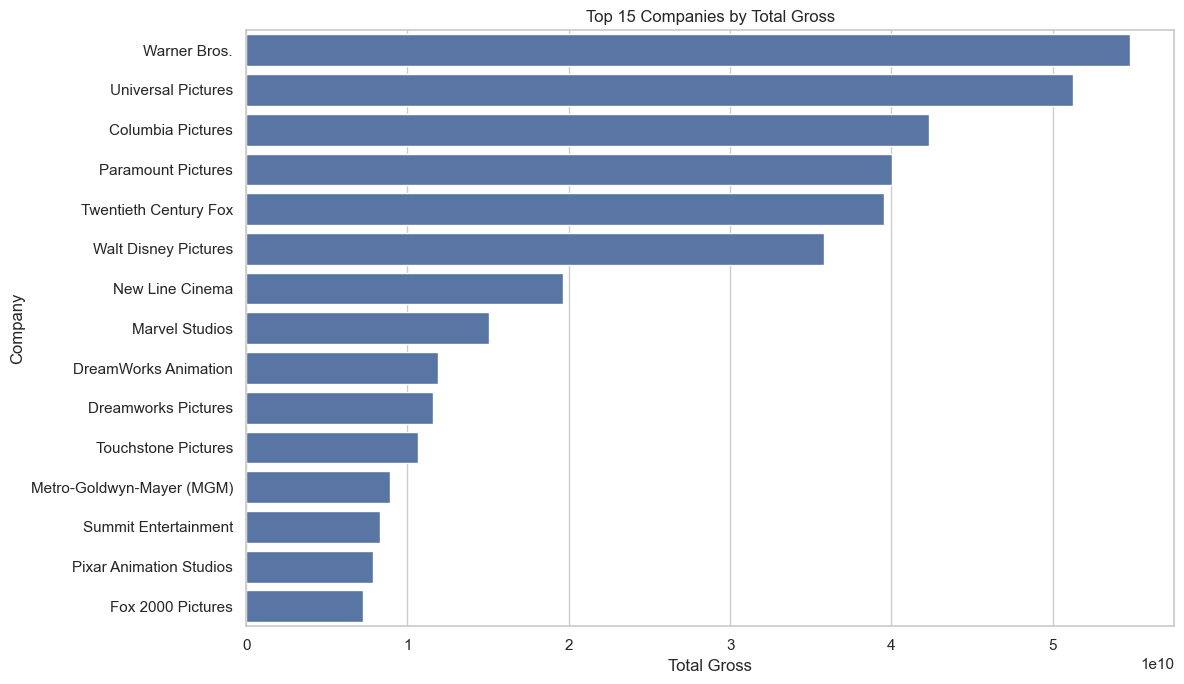

In [9]:
# Barplot
fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(
    data=top_companies,
    x="gross", y="company", orient="h", ax=ax
)
ax.set_title("Top 15 Companies by Total Gross")
ax.set_xlabel("Total Gross")
ax.set_ylabel("Company")
plt.tight_layout()
plt.show()

In [10]:
# Top company-years by gross (to see strong seasons/years)
comp_year = (
    df.dropna(subset=["year"])
      .groupby(["company", "year"], as_index=False)["gross"]
      .sum()
      .sort_values(["gross", "company", "year"], ascending=False)
      .head(15)
)
display(comp_year)

,company,year,gross
2893,Walt Disney Pictures,2019,5773131804
1793,Marvel Studios,2018,4018631866
2805,Universal Pictures,2015,3834354888
2715,Twentieth Century Fox,2009,3793491246
2891,Walt Disney Pictures,2017,3789382071
2141,Paramount Pictures,2011,3565705182
2928,Warner Bros.,2011,3168551343
2884,Walt Disney Pictures,2010,3104474158
2144,Paramount Pictures,2014,3071298586
778,Columbia Pictures,2019,2932757449


## 7) Correlation Analysis - Numeric Features Only
Pearson correlations among numeric features.

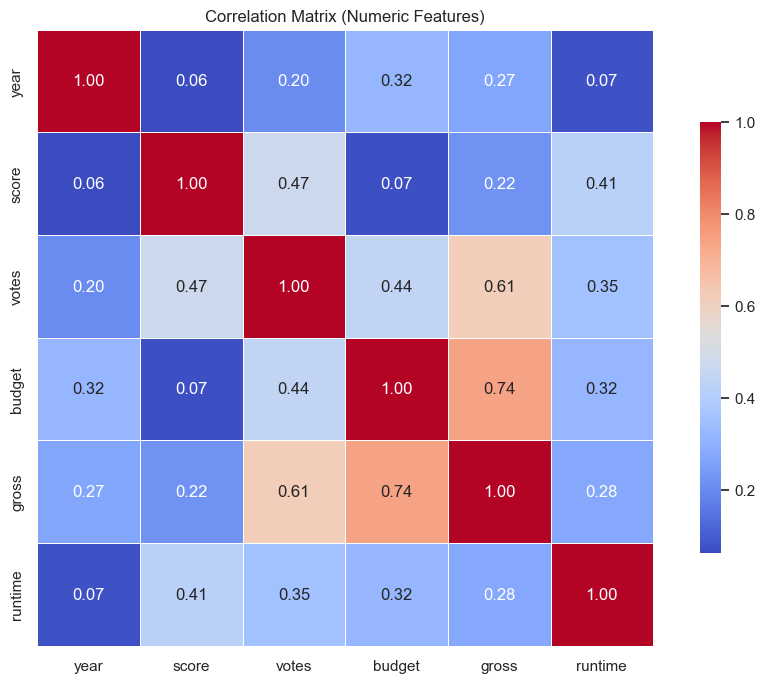

In [11]:
# Pearson correlation matrix
correlation_matrix = df.corr(method="pearson", numeric_only=True) # pearson, kendall, spearman

# Heatmap
fig, ax = plt.subplots()
sns.heatmap(
    correlation_matrix, fmt=".2f", annot=True, cmap="coolwarm",
    linewidths=0.5, square=True, cbar_kws={"shrink": 0.7}, ax=ax
)
ax.set_title("Correlation Matrix (Numeric Features)")
plt.show()

## 8) Correlation — Include Categoricals (Numerized)
Convert object columns to category codes to include them in a correlation matrix.

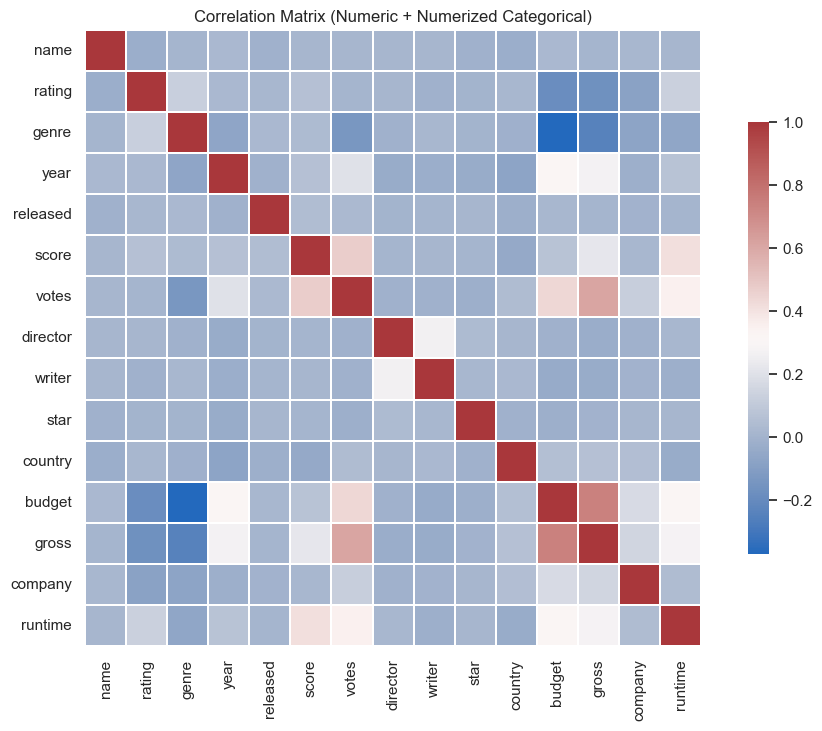

In [12]:
df_numerized = df.copy()

for col in df_numerized.columns:
    if df_numerized[col].dtype == "object":
        df_numerized[col] = df_numerized[col].astype("category").cat.codes

# Heatmap again with numerized data
correlation_matrix = df_numerized.corr(method="pearson", numeric_only=True)

fig, ax = plt.subplots()
sns.heatmap(
    correlation_matrix, annot=False, cmap="vlag",
    linewidths=0.25, square=True, cbar_kws={"shrink": 0.7}, ax=ax
)
ax.set_title("Correlation Matrix (Numeric + Numerized Categorical)")
plt.show()

## 9) Strongest Correlation Pairs
List the strongest positive correlations (> 0.50 and < 1.0).

In [13]:
# Unstack correlation matrix to find strongest pairs
corr_pairs = correlation_matrix.unstack()
sorted_pairs = corr_pairs.sort_values()

# Filter high correlations (> 0.5 but < 1.0)
strong_pairs = sorted_pairs[(sorted_pairs > 0.5) & (sorted_pairs < 1)]
print("High Positive Correlations (> 0.50 & < 1.0):")
display(strong_pairs)

High Positive Correlations (> 0.50 & < 1.0):


gross   votes     0.614904
votes   gross     0.614904
budget  gross     0.740395
gross   budget    0.740395
dtype: float64

## 10) Rating vs Gross (Category Plots)
Category plots can be noisy; we’ll show **strip** and **swarm**.  

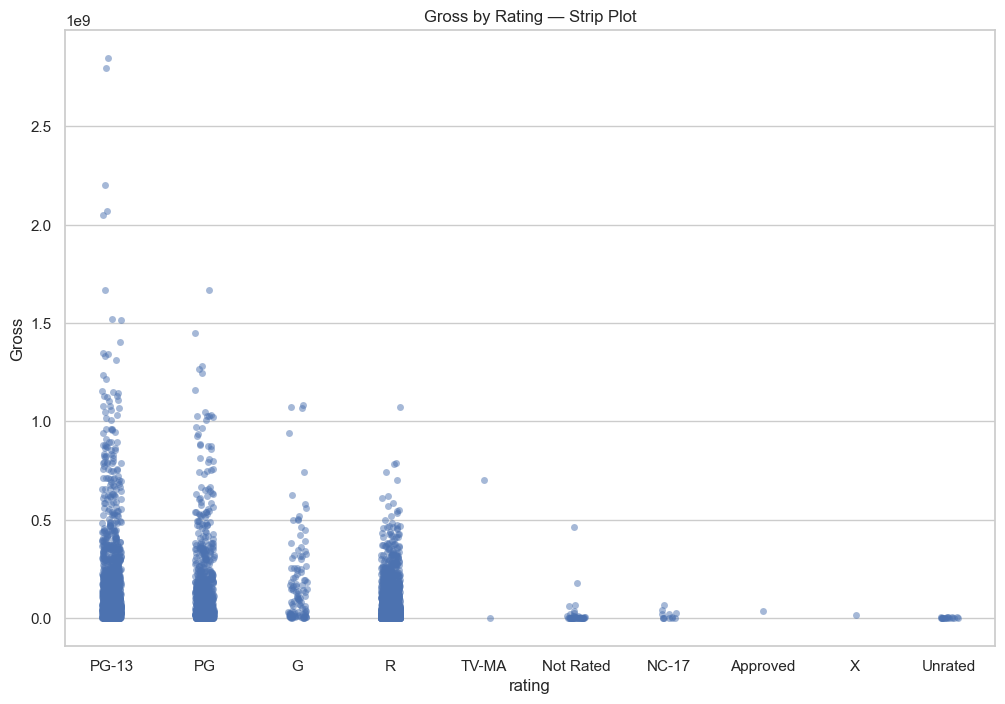

In [14]:
fig, ax = plt.subplots()
sns.stripplot(data=df, x="rating", y="gross", alpha=0.5, ax=ax)
ax.set_title("Gross by Rating — Strip Plot")
ax.set_ylabel("Gross")
plt.show()

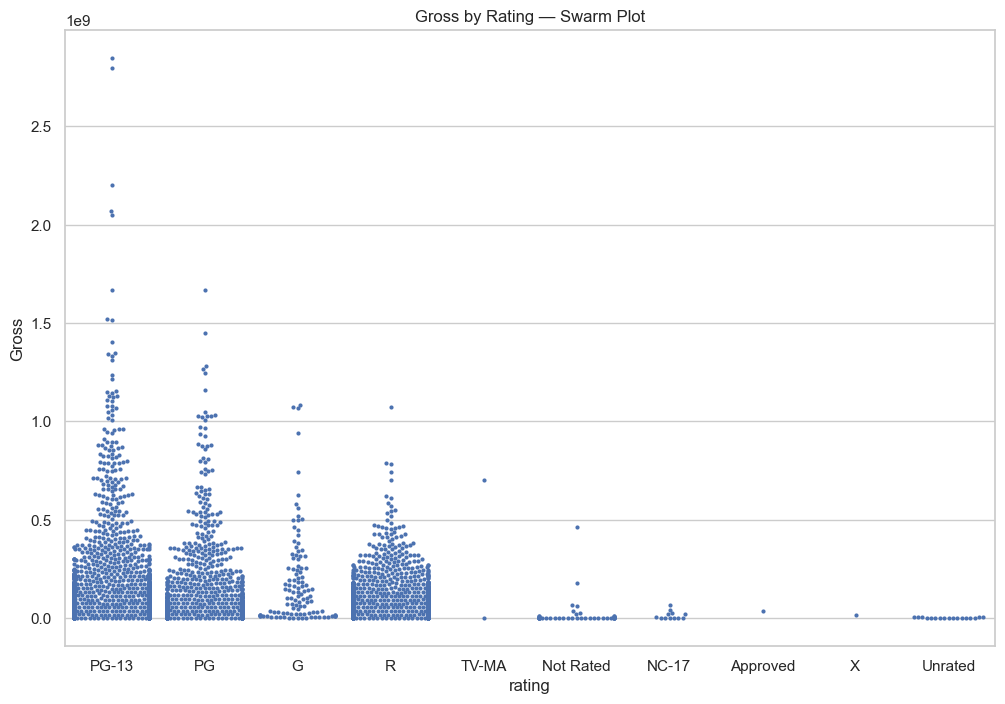

In [15]:
fig, ax = plt.subplots()
sns.swarmplot(data=df, x="rating", y="gross", size=3, ax=ax)
ax.set_title("Gross by Rating — Swarm Plot")
ax.set_ylabel("Gross")
plt.show()

## 🔑 Conclusions

- **Budget** and **Votes** show the strongest correlation with **Gross Earnings**.
- Categorical features (e.g., company, rating) benefit from **numerization** to appear in correlation matrices, but their relationships may be **non-linear** or **contextual**.
- Encoding categorical data allows us to explore correlations more fully.